In [24]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv("D:\ExcelR\Assigments\Random_Forests\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [18]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [19]:
data.shape

(600, 6)

In [20]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
data['Undergrad']=le.fit_transform(data['Undergrad'])
data['Marital.Status']=le.fit_transform(data['Marital.Status'])
data['Urban']=le.fit_transform(data['Urban'])
data.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

In [23]:
data.insert(6,'tax_category','')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,


In [25]:
for i in range(0,len(data['tax_category']),1):
    if data['Taxable.Income'][i]<=30000:
        data['tax_category'][i]='0'
    else:
        data['tax_category'][i]='1'

In [26]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


In [42]:
x=data.drop(labels=['tax_category','Taxable.Income'],axis=1)
y=data['tax_category']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(x_train,y_train)

In [45]:
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
print(confusion_matrix(y_test,y_pred_test))

[[ 1 23]
 [ 8 88]]


<AxesSubplot:>

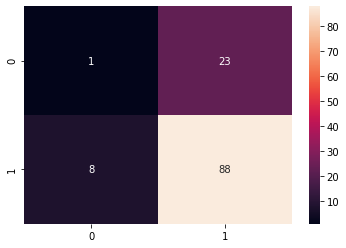

In [49]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_test,annot=True)

In [47]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.11      0.04      0.06        24
           1       0.79      0.92      0.85        96

    accuracy                           0.74       120
   macro avg       0.45      0.48      0.46       120
weighted avg       0.66      0.74      0.69       120



In [48]:
print(accuracy_score(y_test,y_pred_test))

0.7416666666666667


In [50]:
auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

auc value for test data 0.47916666666666663


In [51]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators' : [20,50,70,100,150]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 20}
0.7916666666666667


In [52]:
rf_model_tweak=RandomForestClassifier( n_estimators=20,min_samples_split=4,max_depth=10,min_samples_leaf=3).fit(x_train,y_train)
y_pred_test_tweak=rf_model_tweak.predict(x_test)

In [53]:
print(classification_report(y_test,y_pred_test_tweak))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.80      0.99      0.88        96

    accuracy                           0.79       120
   macro avg       0.40      0.49      0.44       120
weighted avg       0.64      0.79      0.71       120



In [54]:
print(accuracy_score(y_test,y_pred_test_tweak))

0.7916666666666666


In [55]:
auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

auc value for test data 0.4947916666666667
